In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv(r'..\data\pred_main\pred_main.csv')

In [5]:
df.rename(columns={
    'UDI': 'UDI',
    'Product ID': 'Product_ID',
    'Type': 'Type',
    'Air temperature [K]': 'Air_temperature',
    'Process temperature [K]': 'Process_temperature',
    'Rotational speed [rpm]': 'Rotational_speed',
    'Torque [Nm]': 'Torque',
    'Tool wear [min]': 'Tool_wear',
    'Machine failure': 'Machine_failure'
}, inplace=True)

In [6]:
#synthetic timestamps, creating timeseries
start_date = pd.Timestamp("2024-01-01 08:00:00")
df['Timestamp'] = [start_date + pd.Timedelta(minutes=5*i) for i in range(len(df))]

In [7]:
cols = ['Timestamp'] + [c for c in df.columns if c != 'Timestamp']
df = df[cols]

In [8]:
#synthetic sensor blackout
start_index = 2000
end_index = 2050
print(f"blackout from: {df.iloc[start_index]['Timestamp']} to {df.iloc[end_index]['Timestamp']}")

blackout from: 2024-01-08 06:40:00 to 2024-01-08 10:50:00


In [9]:
col_blackout = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque']
original = df.loc[start_index:end_index, col_blackout].copy()

In [10]:
df.loc[start_index:end_index, col_blackout] = np.nan
print(df.loc[start_index:end_index, col_blackout].isnull().sum())

Air_temperature        51
Process_temperature    51
Rotational_speed       51
Torque                 51
dtype: int64


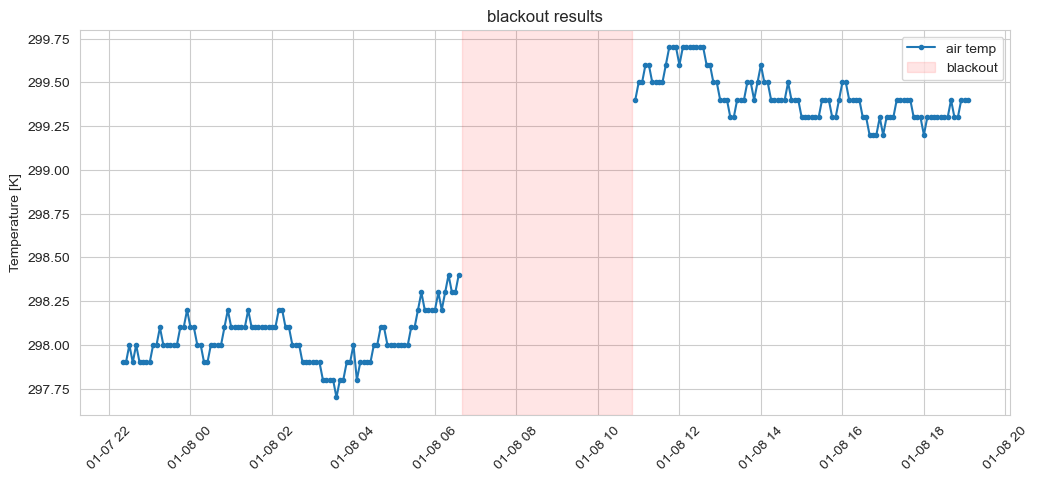

In [11]:
plt.figure(figsize=(12, 5))
subset = df.iloc[1900:2150]
plt.plot(subset['Timestamp'], subset['Air_temperature'], marker='o', ms=3, label='air temp')
plt.title("blackout results")
plt.ylabel("Temperature [K]")
plt.xticks(rotation=45)
plt.axvspan(subset.iloc[100]['Timestamp'], subset.iloc[150]['Timestamp'], color='red', alpha=0.1, label='blackout')
plt.legend()
plt.show()

In [12]:
df[col_blackout] = df[col_blackout].interpolate(method='linear', limit_direction='both')

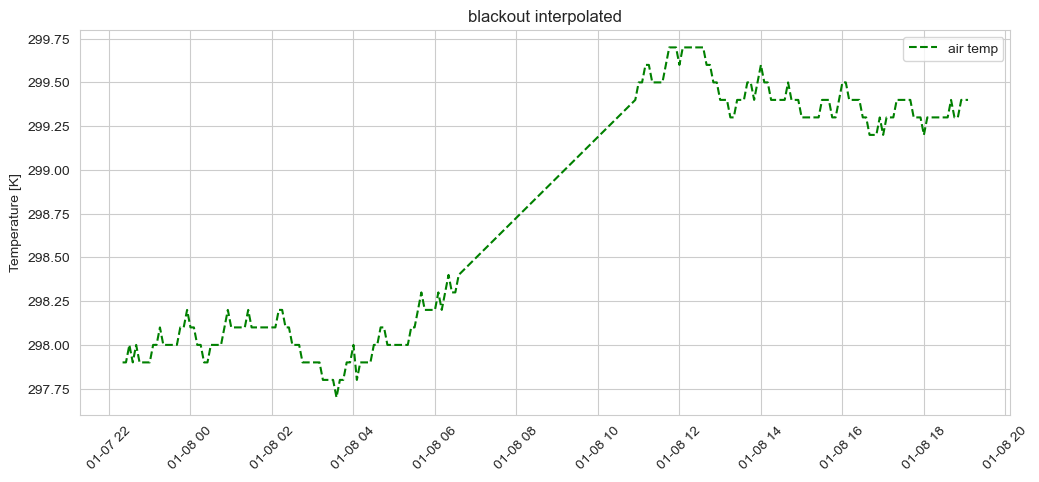

In [13]:
plt.figure(figsize=(12, 5))
subset = df.iloc[1900:2150]
plt.plot(subset['Timestamp'], subset['Air_temperature'], color='green', linestyle='--', label='air temp')
plt.title("blackout interpolated")
plt.ylabel("Temperature [K]")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [14]:
df.to_csv('../data/cleaned_pred_main.csv', index=False)